<H1>Analyst: Jessie Mompero</H1>

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use("ggplot")

<H1>DATA FRAME</H1>

In [28]:
df = pd.read_csv('datasets/Family Income and Expenditure.csv')

In [29]:
df

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,...,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,...,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,...,1,0,0,0,0,3,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41539,119773,XII - SOCCSKSARGEN,44875,Enterpreneurial Activities,1,23675,21542,1476,6120,1632,...,0,0,0,0,0,1,0,0,0,0
41540,137320,XII - SOCCSKSARGEN,31157,Enterpreneurial Activities,1,2691,1273,1886,4386,1840,...,0,0,0,0,0,3,0,0,0,0
41541,133171,XII - SOCCSKSARGEN,45882,Enterpreneurial Activities,2,28646,27339,480,4796,1232,...,0,0,0,0,0,1,0,0,0,0
41542,129500,XII - SOCCSKSARGEN,81416,Enterpreneurial Activities,1,29996,26655,2359,17730,2923,...,0,0,0,0,0,2,0,0,0,0


<h1>FILLING UP NULL VALUES</h1>

In [30]:
df['Household Head Occupation'] = df['Household Head Occupation'].fillna('unaccounted')
df['Household Head Class of Worker'] = df['Household Head Class of Worker'].fillna('unaccounted')
df['Toilet Facilities'] = df['Toilet Facilities'].fillna('unaccounted')
df.isnull().sum()

Total Household Income                           0
Region                                           0
Total Food Expenditure                           0
Main Source of Income                            0
Agricultural Household indicator                 0
Bread and Cereals Expenditure                    0
Total Rice Expenditure                           0
Meat Expenditure                                 0
Total Fish and  marine products Expenditure      0
Fruit Expenditure                                0
Vegetables Expenditure                           0
Restaurant and hotels Expenditure                0
Alcoholic Beverages Expenditure                  0
Tobacco Expenditure                              0
Clothing, Footwear and Other Wear Expenditure    0
Housing and water Expenditure                    0
Imputed House Rental Value                       0
Medical Care Expenditure                         0
Transportation Expenditure                       0
Communication Expenditure      

Average Household Income by Region:
Region
X - Northern Mindanao         64112.585586
 ARMM                         64931.270463
IX - Zasmboanga Peninsula     69645.318233
VIII - Eastern Visayas        69833.928969
IVB - MIMAROPA                70760.293835
XII - SOCCSKSARGEN            71738.088596
Caraga                        71912.659933
II - Cagayan Valley           75604.358269
V - Bicol Region              76811.412217
VI - Western Visayas          79829.025956
CAR                           80352.780290
I - Ilocos Region             80649.937819
XI - Davao Region             81126.927228
VII - Central Visayas         84307.184179
III - Central Luzon           99726.701576
IVA - CALABARZON             105333.949543
NCR                          127080.456659
Name: Total Food Expenditure, dtype: float64


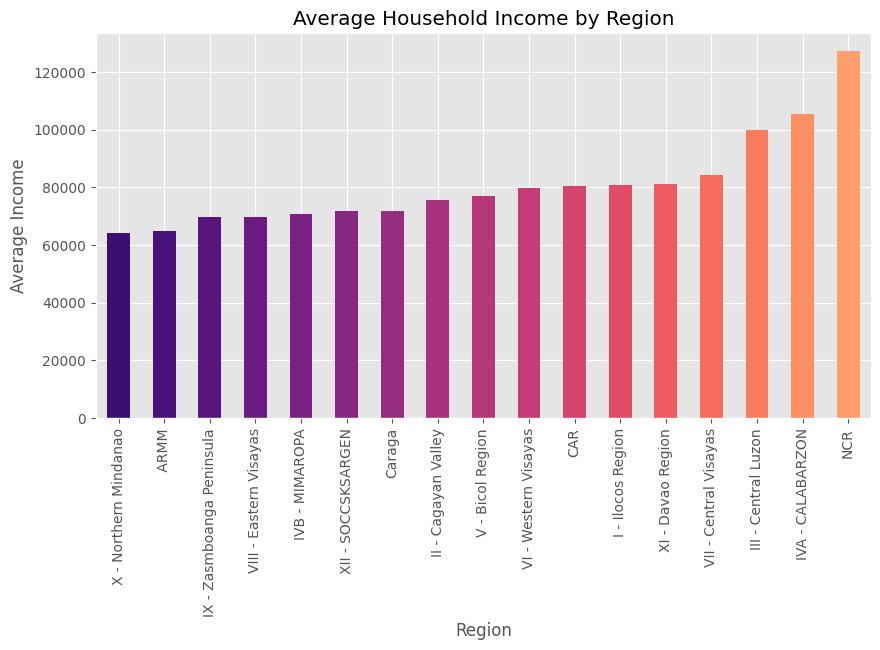

In [31]:
import matplotlib.pyplot as plt

# Compute mean household income by region
region_income = df.groupby("Region")["Total Food Expenditure"].mean().sort_values()

# Print exact numbers
print("Average Household Income by Region:")
print(region_income)

# Plot bar chart
plt.figure(figsize=(10,5))
region_income.plot(kind="bar", color=plt.cm.magma(np.linspace(0.2,0.8,len(region_income))))
plt.title("Average Household Income by Region")
plt.ylabel("Average Income")
plt.xticks(rotation=90)
plt.show()


In [32]:
ncr_region = df[df['Region'] == 'NCR']


In [33]:
df['Region'] = df['Region'].str.strip()

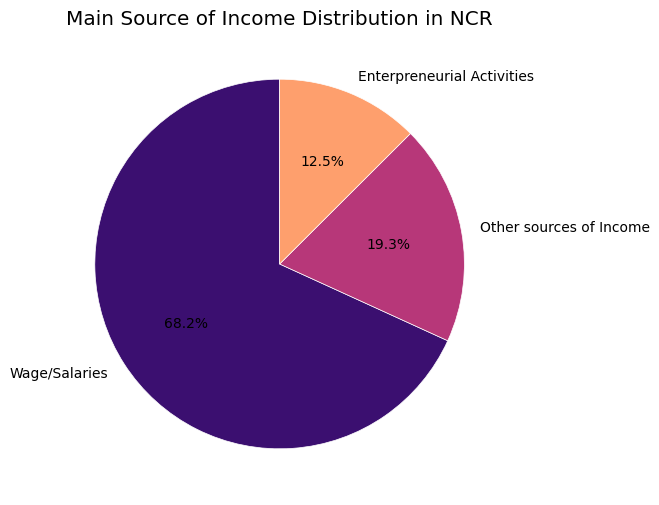

In [34]:
# Filter NCR region
ncr_region = df[df['Region'] == 'NCR']

# Calculate percentage distribution
income_percentage = ncr_region['Main Source of Income'].value_counts(normalize=True) * 100

# Plot pie chart
plt.figure(figsize=(6,6))
colors = plt.cm.magma(np.linspace(0.2, 0.8, len(income_percentage)))  # magma colormap
income_percentage.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'edgecolor':'white'}
)

plt.title('Main Source of Income Distribution in NCR')
plt.ylabel('')  # remove y-label for cleaner look
plt.show()

Percentage distribution of Main Source of Income (ARMM):
Main Source of Income
Enterpreneurial Activities    77.980427
Wage/Salaries                 16.370107
Other sources of Income        5.649466
Name: proportion, dtype: float64


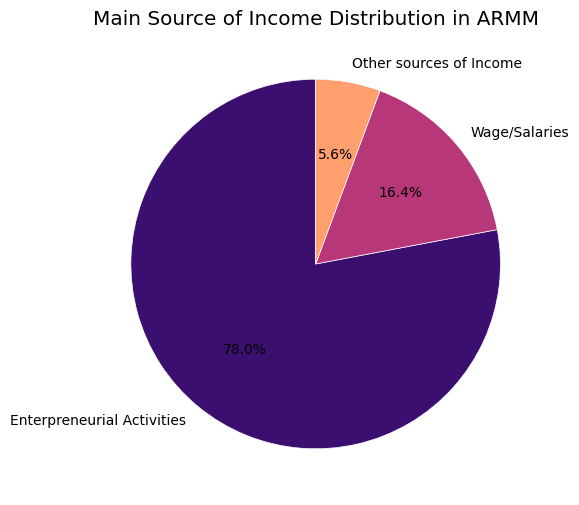

In [35]:
# Filter ARMM region
armm_region = df[df['Region'] == 'ARMM']

# Calculate percentage distribution
armm_income_percentage = armm_region['Main Source of Income'].value_counts(normalize=True) * 100
print("Percentage distribution of Main Source of Income (ARMM):")
print(armm_income_percentage)

# Plot pie chart
plt.figure(figsize=(6,6))
colors = plt.cm.magma(np.linspace(0.2, 0.8, len(armm_income_percentage)))  # magma colormap
armm_income_percentage.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'edgecolor':'white'}
)

plt.title('Main Source of Income Distribution in ARMM')
plt.ylabel('')
plt.show()

Percentage distribution of Main Source of Income (All Regions):
Main Source of Income
Wage/Salaries                 49.075679
Other sources of Income       26.083189
Enterpreneurial Activities    24.841132
Name: proportion, dtype: float64


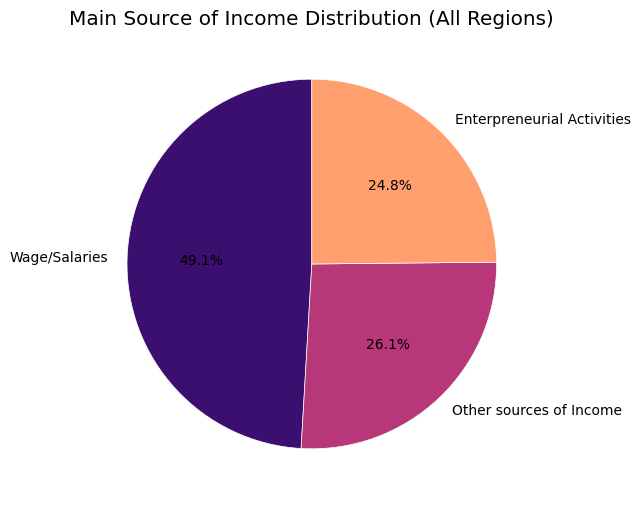

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate percentage distribution for the whole dataset
income_percentage_all = df['Main Source of Income'].value_counts(normalize=True) * 100
print("Percentage distribution of Main Source of Income (All Regions):")
print(income_percentage_all)

# Plot pie chart
plt.figure(figsize=(6,6))
colors = plt.cm.magma(np.linspace(0.2, 0.8, len(income_percentage_all)))  # magma colormap
income_percentage_all.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'edgecolor':'white'}
)

plt.title('Main Source of Income Distribution (All Regions)')
plt.ylabel('')
plt.show()


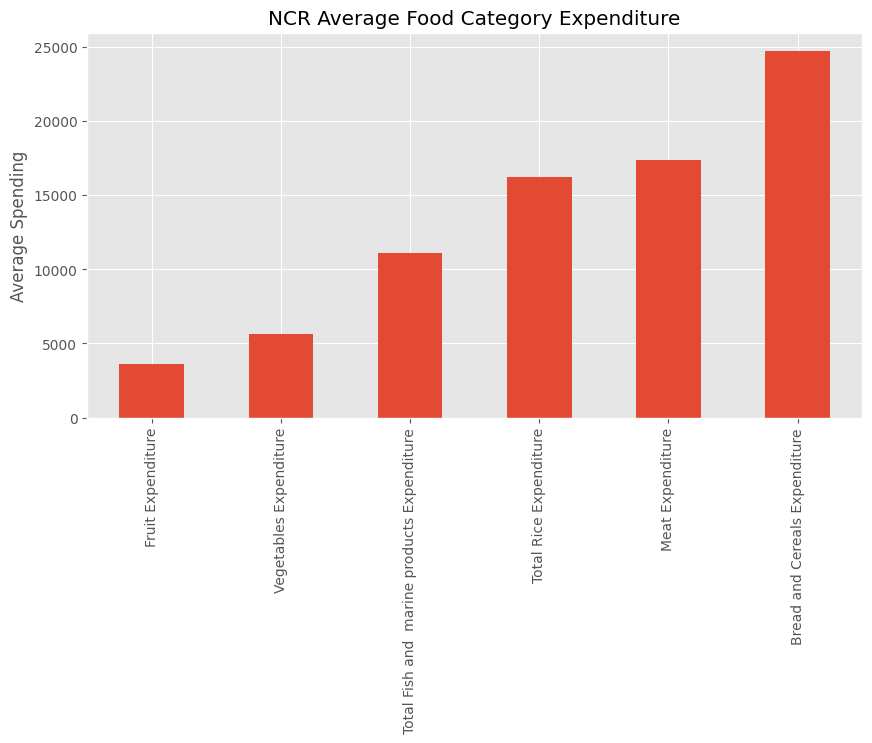

In [37]:
food_cols = [
    "Bread and Cereals Expenditure", "Total Rice Expenditure",
    "Meat Expenditure", "Total Fish and  marine products Expenditure",
    "Fruit Expenditure", "Vegetables Expenditure"
]

ncr_region[food_cols].mean().sort_values().plot(kind="bar", figsize=(10,5))
plt.title("NCR Average Food Category Expenditure")
plt.ylabel("Average Spending")
plt.show()

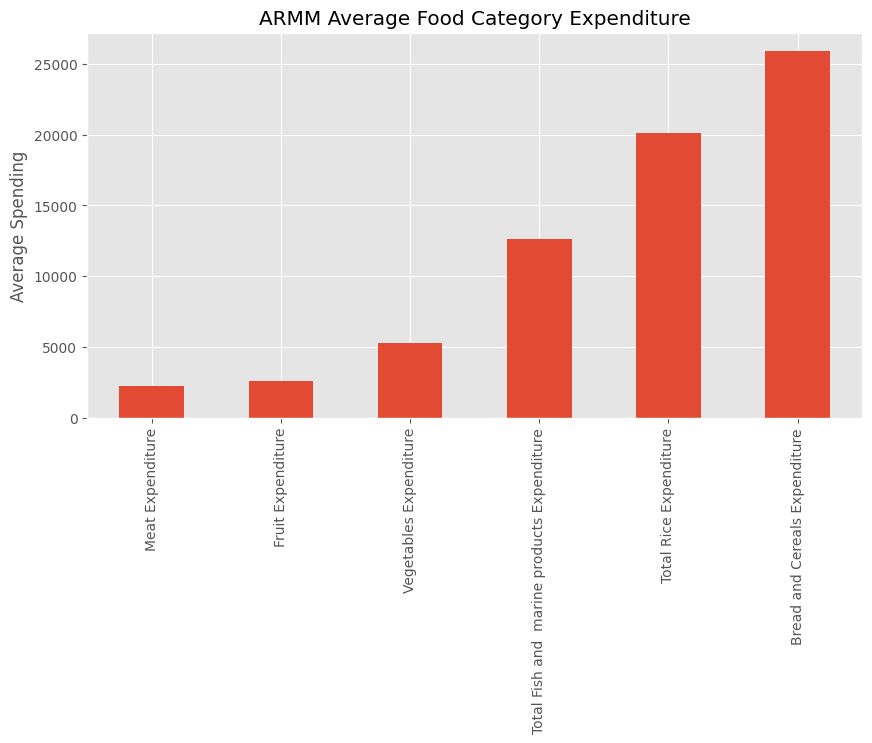

In [38]:
food_cols = [
    "Bread and Cereals Expenditure", "Total Rice Expenditure",
    "Meat Expenditure", "Total Fish and  marine products Expenditure",
    "Fruit Expenditure", "Vegetables Expenditure"
]

armm_region[food_cols].mean().sort_values().plot(kind="bar", figsize=(10,5))
plt.title("ARMM Average Food Category Expenditure")
plt.ylabel("Average Spending")
plt.show()

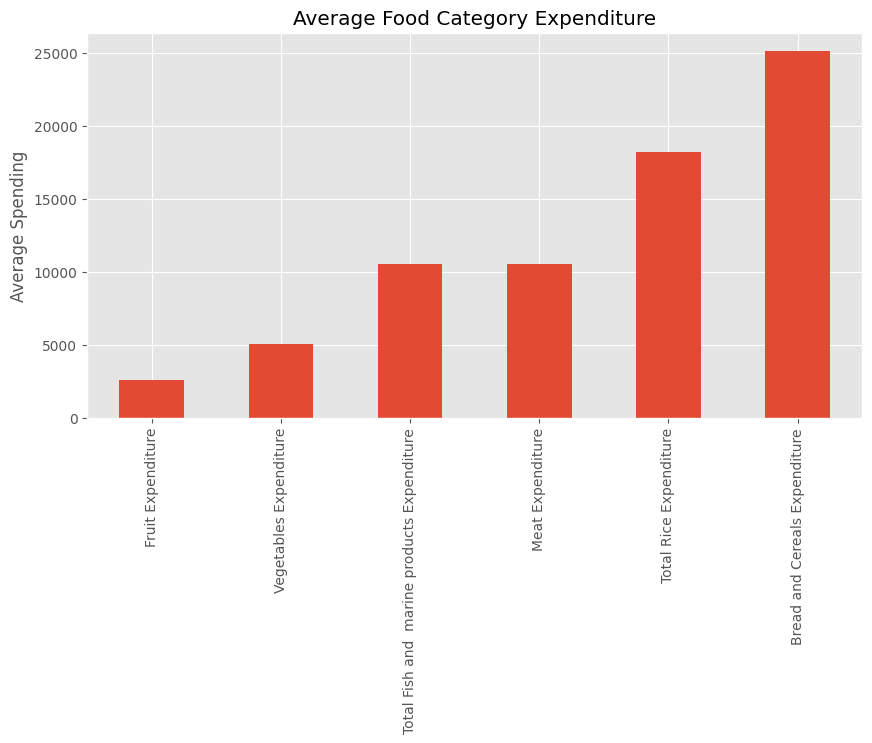

In [39]:
food_cols = [
    "Bread and Cereals Expenditure", "Total Rice Expenditure",
    "Meat Expenditure", "Total Fish and  marine products Expenditure",
    "Fruit Expenditure", "Vegetables Expenditure"
]

df[food_cols].mean().sort_values().plot(kind="bar", figsize=(10,5))
plt.title("Average Food Category Expenditure")
plt.ylabel("Average Spending")
plt.show()

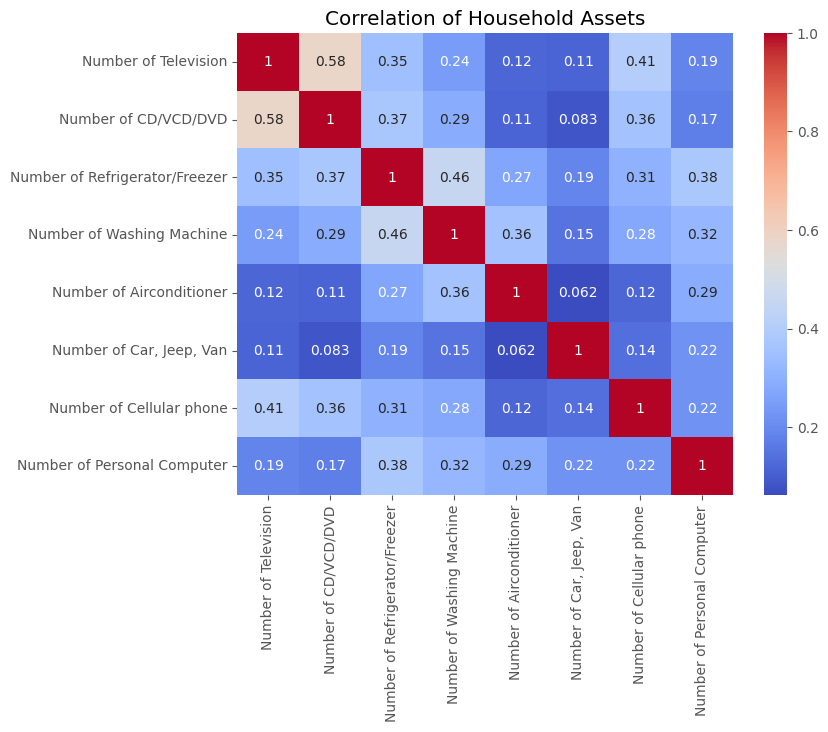

In [40]:
assets = [
    "Number of Television", "Number of CD/VCD/DVD",
    "Number of Refrigerator/Freezer", "Number of Washing Machine",
    "Number of Airconditioner", "Number of Car, Jeep, Van",
    "Number of Cellular phone", "Number of Personal Computer"
]

plt.figure(figsize=(8,6))
sns.heatmap(armm_region[assets].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation of Household Assets")
plt.show()



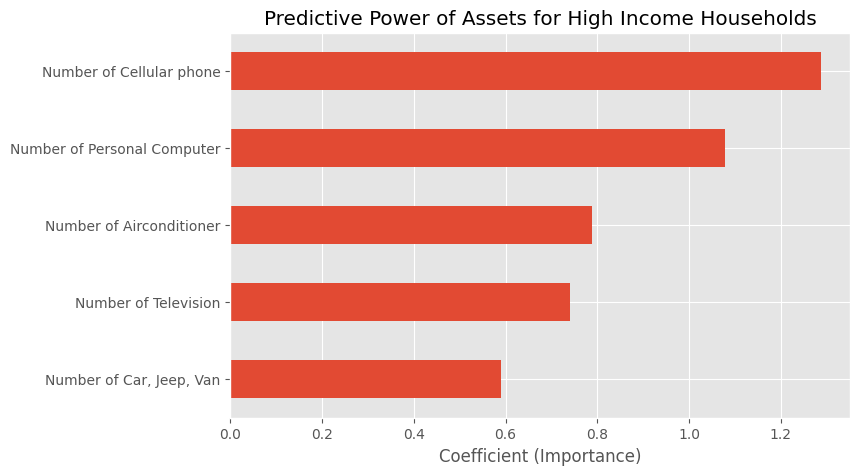

In [41]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

df["HighIncome"] = (df["Total Household Income"] > df["Total Household Income"].median()).astype(int)

X = df[["Number of Television","Number of Cellular phone","Number of Personal Computer",
        "Number of Airconditioner","Number of Car, Jeep, Van"]]

X = X.fillna(0)
y = df["HighIncome"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = LogisticRegression()
model.fit(X_scaled, y)

importance = pd.Series(model.coef_[0], index=X.columns)

importance.sort_values().plot(kind="barh", figsize=(8,5))
plt.title("Predictive Power of Assets for High Income Households")
plt.xlabel("Coefficient (Importance)")
plt.show()


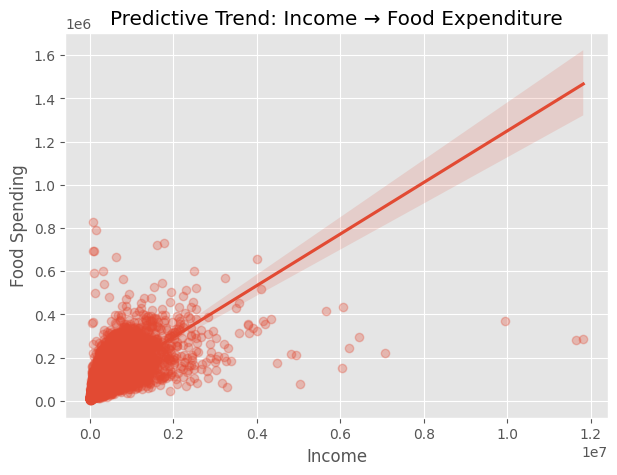

In [42]:
plt.figure(figsize=(7,5))
sns.regplot(x=df["Total Household Income"], y=df["Total Food Expenditure"], scatter_kws={"alpha":0.3})
plt.title("Predictive Trend: Income → Food Expenditure")
plt.xlabel("Income")
plt.ylabel("Food Spending")
plt.show()


<h1>DESCRIPTIVE</h1>

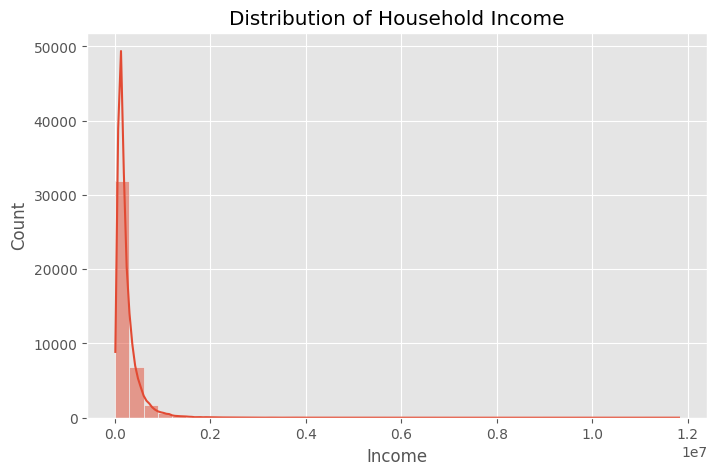

In [43]:
plt.figure(figsize=(8,5))
sns.histplot(df["Total Household Income"], bins=40, kde=True)
plt.title("Distribution of Household Income")
plt.xlabel("Income")
plt.ylabel("Count")
plt.show()


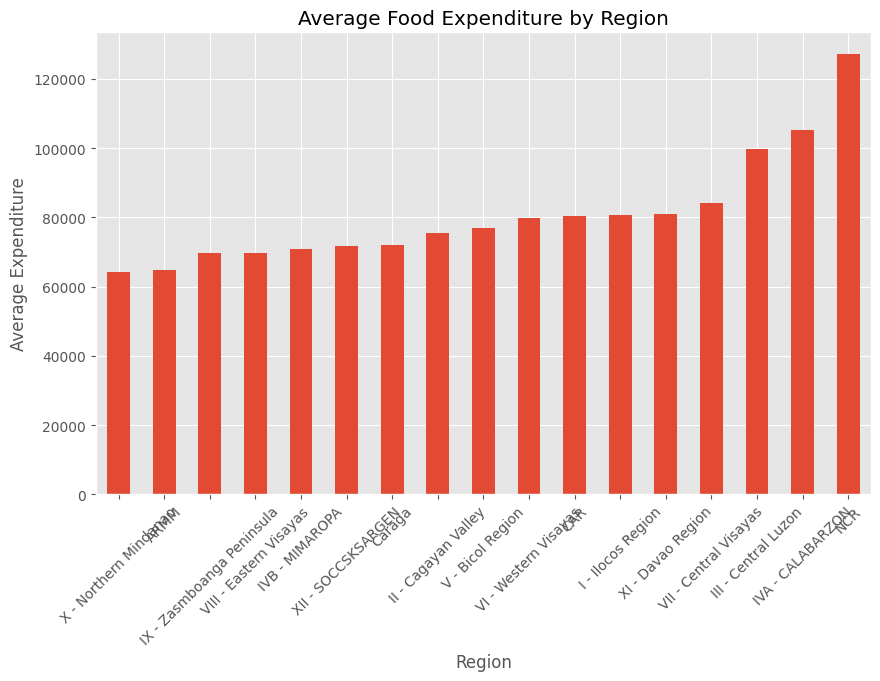

In [44]:
plt.figure(figsize=(10,6))
df.groupby("Region")["Total Food Expenditure"].mean().sort_values().plot(kind="bar")
plt.title("Average Food Expenditure by Region")
plt.ylabel("Average Expenditure")
plt.xticks(rotation=45)
plt.show()


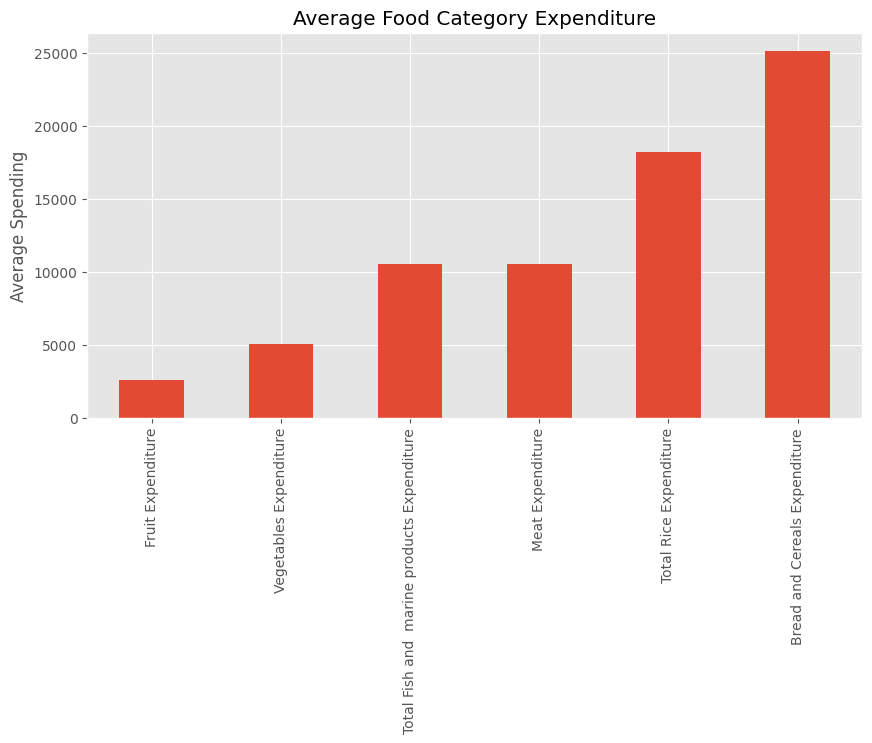

In [45]:
food_cols = [
    "Bread and Cereals Expenditure", "Total Rice Expenditure",
    "Meat Expenditure", "Total Fish and  marine products Expenditure",
    "Fruit Expenditure", "Vegetables Expenditure"
]

df[food_cols].mean().sort_values().plot(kind="bar", figsize=(10,5))
plt.title("Average Food Category Expenditure")
plt.ylabel("Average Spending")
plt.show()


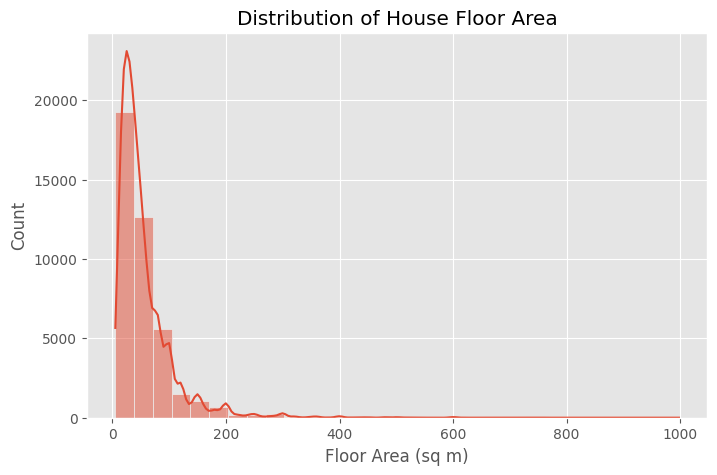

In [46]:
plt.figure(figsize=(8,5))
sns.histplot(df["House Floor Area"], bins=30, kde=True)
plt.title("Distribution of House Floor Area")
plt.xlabel("Floor Area (sq m)")
plt.show()


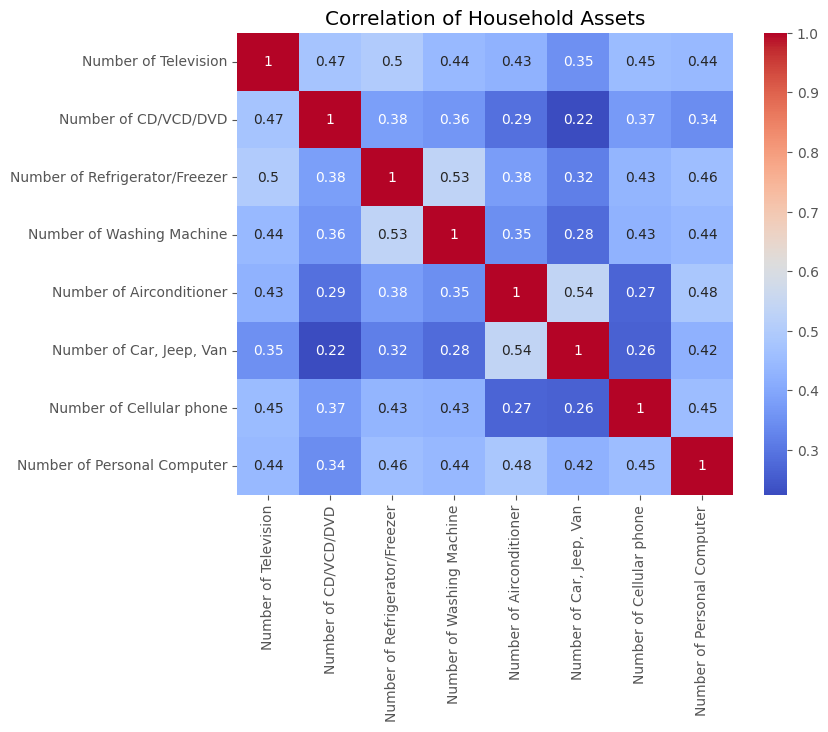

In [53]:
assets = [
    "Number of Television", "Number of CD/VCD/DVD",
    "Number of Refrigerator/Freezer", "Number of Washing Machine",
    "Number of Airconditioner", "Number of Car, Jeep, Van",
    "Number of Cellular phone", "Number of Personal Computer"
]

plt.figure(figsize=(8,6))
sns.heatmap(df[assets].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation of Household Assets")
plt.show()


<h1>Diagnostic</h1>

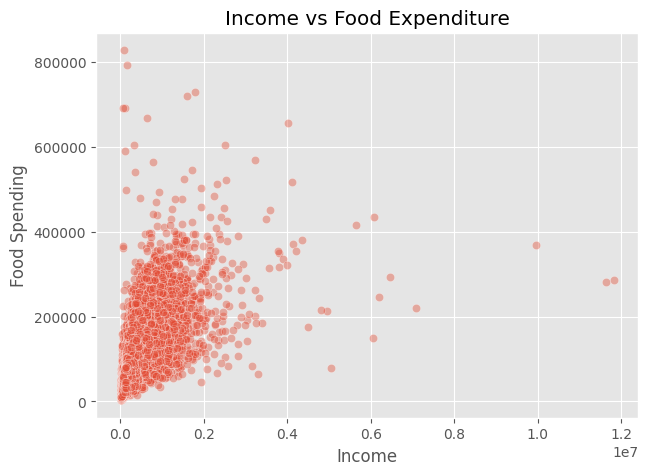

In [48]:
plt.figure(figsize=(7,5))
sns.scatterplot(x=df["Total Household Income"], y=df["Total Food Expenditure"], alpha=0.4)
plt.title("Income vs Food Expenditure")
plt.xlabel("Income")
plt.ylabel("Food Spending")
plt.show()


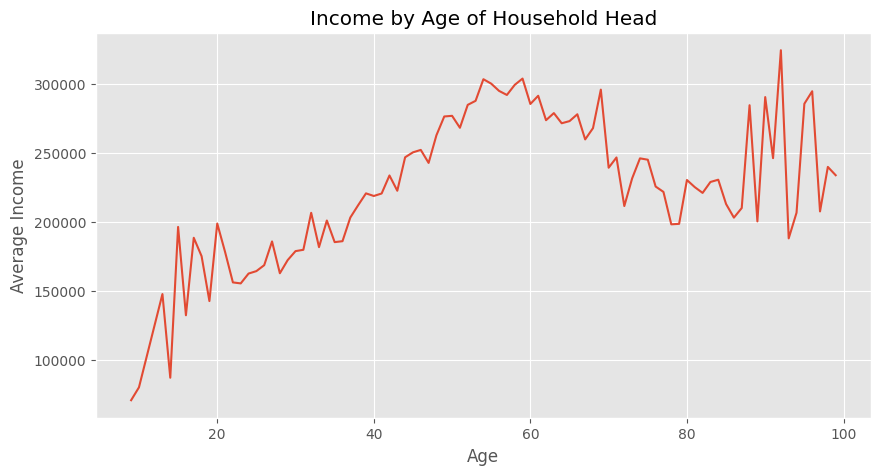

In [49]:
age_income = df.groupby("Household Head Age")["Total Household Income"].mean()

plt.figure(figsize=(10,5))
age_income.plot()
plt.title("Income by Age of Household Head")
plt.xlabel("Age")
plt.ylabel("Average Income")
plt.show()


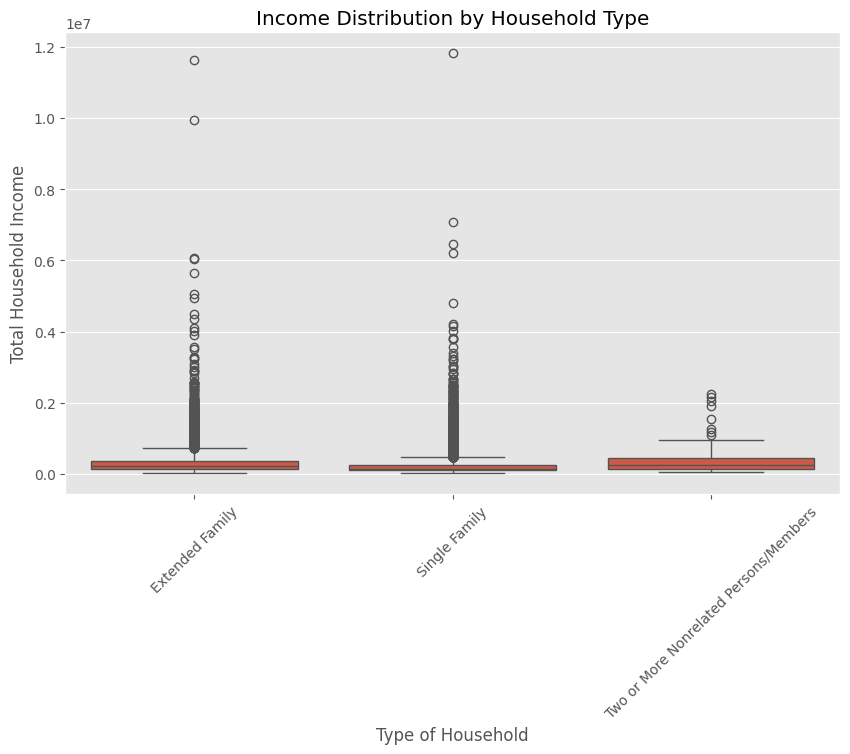

In [50]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="Type of Household", y="Total Household Income")
plt.xticks(rotation=45)
plt.title("Income Distribution by Household Type")
plt.show()


<h1>Predictive</h1>

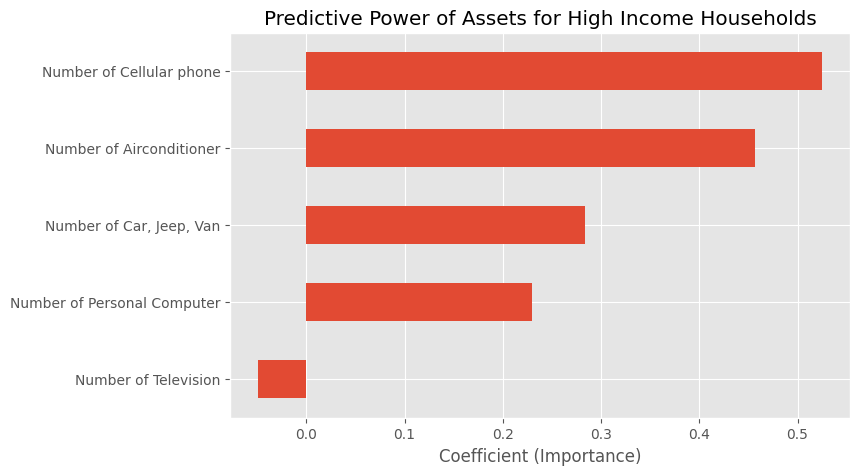

In [61]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

armm_region = df[df["Region"] == "ARMM"].copy()

# Create HighIncome column safely using .loc
armm_region.loc[:, "HighIncome"] = (
    armm_region["Total Household Income"] > armm_region["Total Household Income"].median()
).astype(int)

# Select features
X = armm_region[[
    "Number of Television",
    "Number of Cellular phone",
    "Number of Personal Computer",
    "Number of Airconditioner",
    "Number of Car, Jeep, Van"
]].fillna(0)  # Fill missing values

# Target variable
y = armm_region["HighIncome"]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train logistic regression
model = LogisticRegression()
model.fit(X_scaled, y)

# Get feature importance (coefficients)
importance = pd.Series(model.coef_[0], index=X.columns)

# Plot
importance.sort_values().plot(kind="barh", figsize=(8,5))
plt.title("Predictive Power of Assets for High Income Households")
plt.xlabel("Coefficient (Importance)")
plt.show()


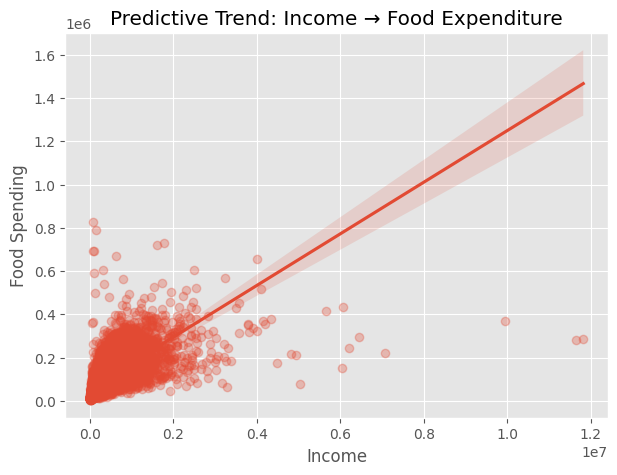

In [52]:
plt.figure(figsize=(7,5))
sns.regplot(x=df["Total Household Income"], y=df["Total Food Expenditure"], scatter_kws={"alpha":0.3})
plt.title("Predictive Trend: Income → Food Expenditure")
plt.xlabel("Income")
plt.ylabel("Food Spending")
plt.show()


In [67]:
df['Region'].value_counts()

Region
IVA - CALABARZON             4162
NCR                          4130
III - Central Luzon          3237
VI - Western Visayas         2851
VII - Central Visayas        2541
V - Bicol Region             2472
XI - Davao Region            2446
I - Ilocos Region            2348
VIII - Eastern Visayas       2337
ARMM                         2248
II - Cagayan Valley          2219
XII - SOCCSKSARGEN           2122
X - Northern Mindanao        1887
IX - Zasmboanga Peninsula    1788
Caraga                       1782
CAR                          1725
IVB - MIMAROPA               1249
Name: count, dtype: int64